In [16]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
dfhead = pd.read_csv('NBAFutures1.csv')
dftail = pd.read_csv('NBAFuturesTest1.csv')
df = dfhead.append(dftail, ignore_index = True)
df.head()

,Unnamed: 0,Player,Year,Pos,Age,Tm,G,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,PTS2,TRB2,AST2,STL2,BLK2
0,0,Kareem Abdul-Jabbar,1980,C,32,LAL,82,38.3,10.2,16.9,...,1.0,3.4,3.6,2.6,24.8,26.2,10.3,3.4,0.7,2.9
1,1,Kareem Abdul-Jabbar,1981,C,33,LAL,80,37.2,10.5,18.2,...,0.7,2.9,3.1,3.1,26.2,23.9,8.7,3.0,0.8,2.7
2,2,Kareem Abdul-Jabbar,1982,C,34,LAL,76,35.2,9.9,17.1,...,0.8,2.7,3.0,2.9,23.9,21.8,7.5,2.5,0.8,2.2
3,3,Kareem Abdul-Jabbar,1983,C,35,LAL,79,32.3,9.1,15.5,...,0.8,2.2,2.5,2.8,21.8,21.5,7.3,2.6,0.7,1.8
4,4,Kareem Abdul-Jabbar,1984,C,36,LAL,80,32.8,9.0,15.5,...,0.7,1.8,2.8,2.6,21.5,22.0,7.9,3.2,0.8,2.1


In [17]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
#Stationarize?
#Try to predict Diffs
#Then just add

In [18]:
dum1 = pd.get_dummies(df['Pos'])
dum2 = pd.get_dummies(df['Tm'])
df1 = pd.concat([df, dum1, dum2], axis=1)
df1 = df1.drop(['Pos','Tm'], axis=1)
df1 = df1.set_index('Player')
df1.head()

,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,...,SAC,SAS,SDC,SEA,TOR,TOT,UTA,VAN,WAS,WSB
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,82,38.3,10.2,16.9,0.0,0.0,10.2,16.9,...,0,0,0,0,0,0,0,0,0,0
Kareem Abdul-Jabbar,1981,33,80,37.2,10.5,18.2,0.0,0.0,10.5,18.2,...,0,0,0,0,0,0,0,0,0,0
Kareem Abdul-Jabbar,1982,34,76,35.2,9.9,17.1,0.0,0.0,9.9,17.1,...,0,0,0,0,0,0,0,0,0,0
Kareem Abdul-Jabbar,1983,35,79,32.3,9.1,15.5,0.0,0.0,9.1,15.5,...,0,0,0,0,0,0,0,0,0,0
Kareem Abdul-Jabbar,1984,36,80,32.8,9.0,15.5,0.0,0.0,9.0,15.5,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df2 = df.drop(['Pos','Tm'], axis=1)
df2 = df2.set_index('Player')
df2.head()

,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,...,STL,BLK,TOV,PF,PTS,PTS2,TRB2,AST2,STL2,BLK2
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,82,38.3,10.2,16.9,0.0,0.0,10.2,16.9,...,1.0,3.4,3.6,2.6,24.8,26.2,10.3,3.4,0.7,2.9
Kareem Abdul-Jabbar,1981,33,80,37.2,10.5,18.2,0.0,0.0,10.5,18.2,...,0.7,2.9,3.1,3.1,26.2,23.9,8.7,3.0,0.8,2.7
Kareem Abdul-Jabbar,1982,34,76,35.2,9.9,17.1,0.0,0.0,9.9,17.1,...,0.8,2.7,3.0,2.9,23.9,21.8,7.5,2.5,0.8,2.2
Kareem Abdul-Jabbar,1983,35,79,32.3,9.1,15.5,0.0,0.0,9.1,15.5,...,0.8,2.2,2.5,2.8,21.8,21.5,7.3,2.6,0.7,1.8
Kareem Abdul-Jabbar,1984,36,80,32.8,9.0,15.5,0.0,0.0,9.0,15.5,...,0.7,1.8,2.8,2.6,21.5,22.0,7.9,3.2,0.8,2.1


In [20]:
cols = []
co = df2.columns
for col in co:
    cols = cols + [col]
dum = ['TRB2','AST2','STL2','BLK2']
for du in dum:
    cols.remove(du)

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc2 = StandardScaler()
for col in cols:
    df2[[col]] = sc2.fit_transform(df2[[col]])
sc3 = StandardScaler()
df2[['BLK2']] = sc3.fit_transform(df2[['BLK2']])
sc4 = StandardScaler()
df2[['STL2']] = sc4.fit_transform(df2[['STL2']])
sc5 = StandardScaler()
df2[['AST2']] = sc5.fit_transform(df2[['AST2']])
sc6 = StandardScaler()
df2[['TRB2']] = sc6.fit_transform(df2[['TRB2']])
df2.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,...,STL,BLK,TOV,PF,PTS,PTS2,TRB2,AST2,STL2,BLK2
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.898146,1.407294,0.994375,1.643493,2.921600,1.954709,-0.724465,-0.788993,3.303825,2.479137,...,0.536671,5.430987,2.671705,0.623247,2.542378,2.764691,2.471482,0.721331,0.008694,4.662253
Kareem Abdul-Jabbar,-1.809213,1.662855,0.905152,1.530676,3.053270,2.231069,-0.724465,-0.788993,3.443133,2.785742,...,-0.083946,4.504145,2.067672,1.231994,2.772446,2.400079,1.871146,0.516001,0.210459,4.283902
Kareem Abdul-Jabbar,-1.720280,1.918416,0.726708,1.325552,2.789929,1.997226,-0.724465,-0.788993,3.164517,2.526307,...,0.122926,4.133409,1.946865,0.988495,2.394478,2.067173,1.420895,0.259338,0.210459,3.338025
Kareem Abdul-Jabbar,-1.631346,2.173977,0.860541,1.028123,2.438808,1.657090,-0.724465,-0.788993,2.793029,2.148947,...,0.122926,3.206567,1.342832,0.866746,2.049376,2.019615,1.345853,0.310671,0.008694,2.581323
Kareem Abdul-Jabbar,-1.542413,2.429538,0.905152,1.079404,2.394917,1.657090,-0.724465,-0.788993,2.746593,2.148947,...,-0.083946,2.465093,1.705252,0.623247,2.000076,2.098878,1.570979,0.618666,0.210459,3.148849


In [22]:
df3 = df2[0:len(dfhead)]
df4 = df2[len(dfhead):]

In [24]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [21], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [21], axis=1)
test_x=tests[0]
test_y=tests[1]

In [25]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [26]:
test_y.tail()

,PTS2,TRB2,AST2,STL2,BLK2
Player,,,,,
Derrick White,0.180704,-0.004901,0.977994,0.613990,0.500392
C.J. Williams,-0.976542,-1.205571,-0.613315,-0.596603,-0.823836
D.J. Wilson,-0.469256,0.332788,-0.459318,-0.596603,-0.067134
Guerschon Yabusele,-1.024100,-0.905404,-0.818645,-1.000133,-0.445485
Ante Zizic,-0.152202,0.632955,-0.561983,-1.000133,-0.067134


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


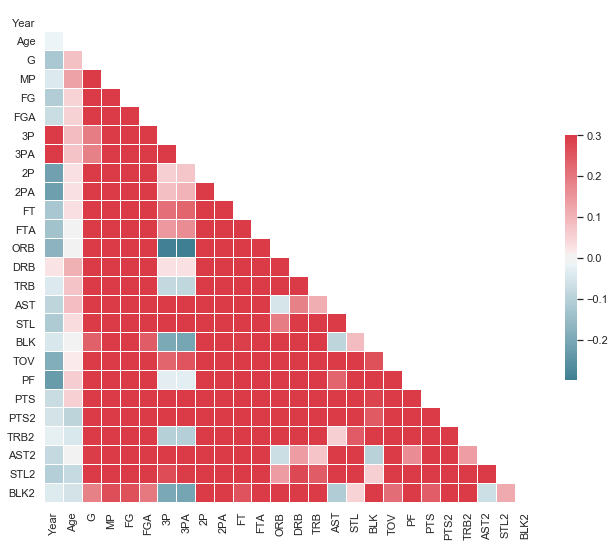

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg = LinearRegression().fit(train_x.values, train_y.PTS2.values)

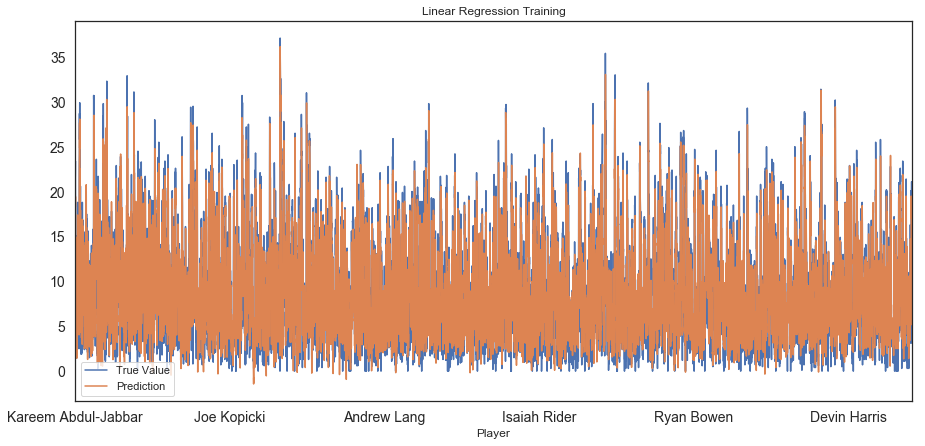

adj train r^2 = 0.7608517855887128
train mse = 9.35321578334584


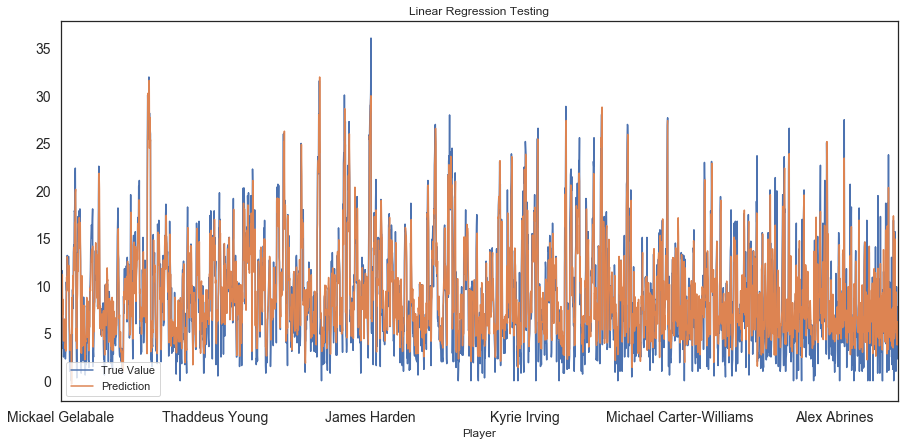

adj test r^2 = 0.7142257930982342
test mse = 9.801178775579276


In [32]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## Extra Trees

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000, bootstrap=True)
reg.fit(train_x.values, train_y.PTS2.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

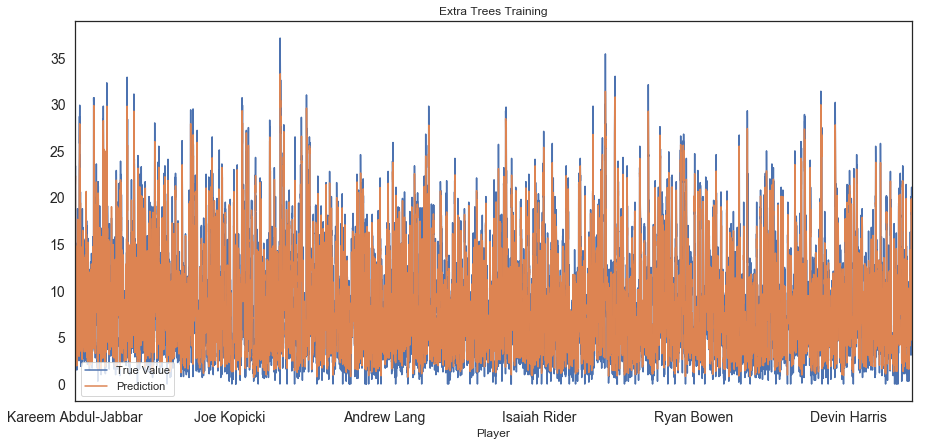

adj train r^2 = 0.9668641526137586
train mse = 1.2959608815415182


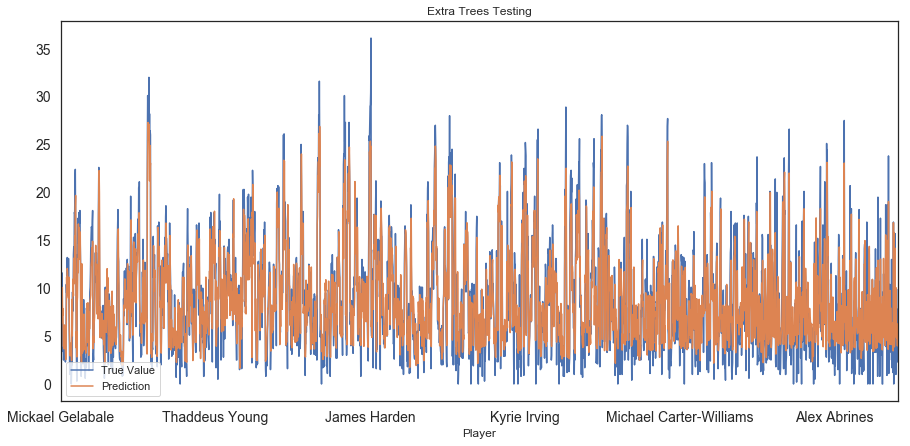

adj test r^2 = 0.7024656113734997
test mse = 10.204516938134462


In [37]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## Random Forrest

In [38]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.PTS2.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

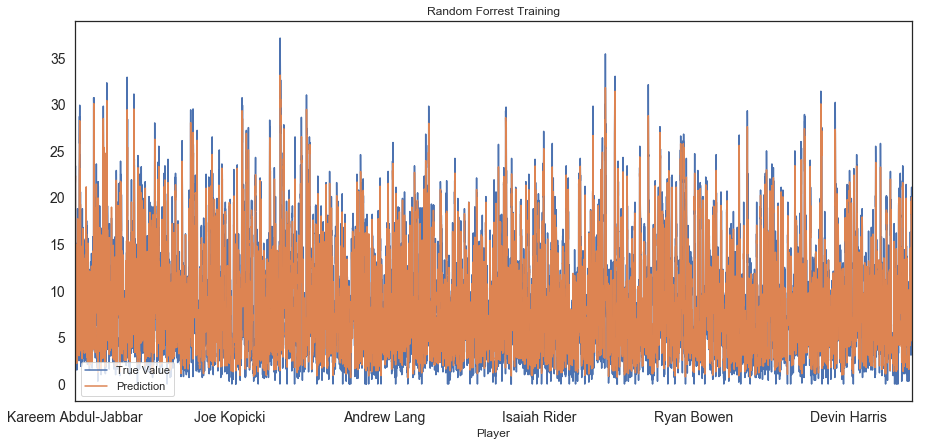

adj train r^2 = 0.9665246840222642
train mse = 1.3092376814362257


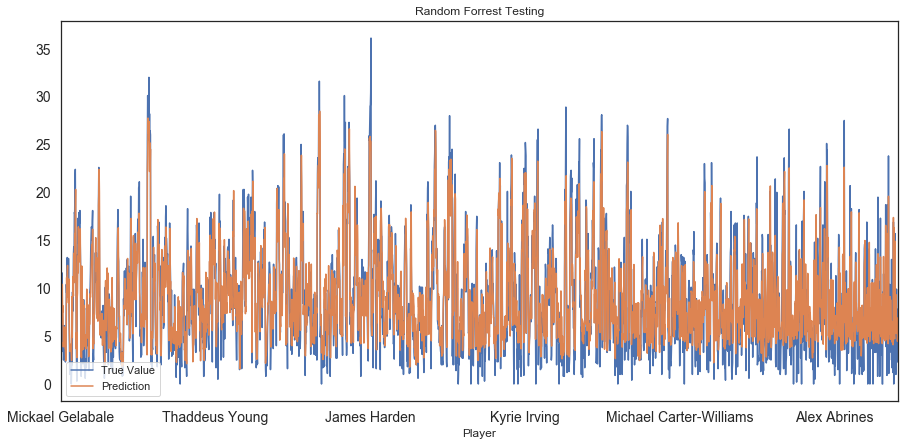

adj test r^2 = 0.6944330755860666
test mse = 10.480008278404137


In [39]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## XGBoost

In [40]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [43]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.PTS2.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

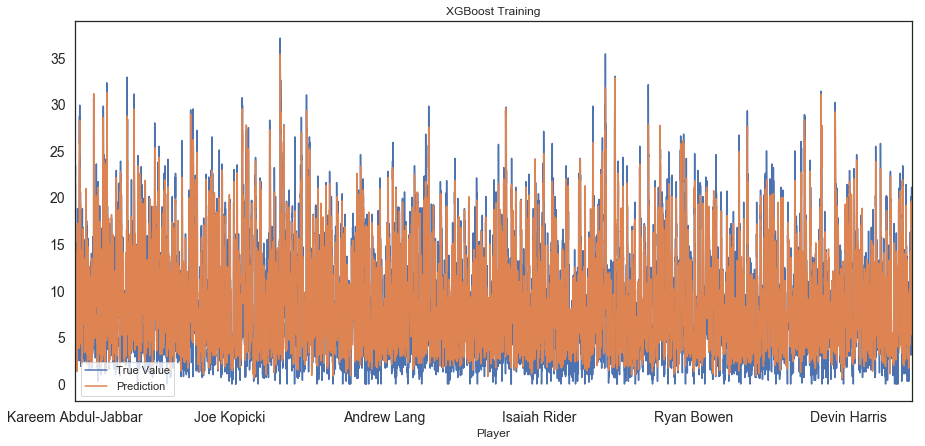

adj train r^2 = 0.8521756099016429
train mse = 5.7814917081236255


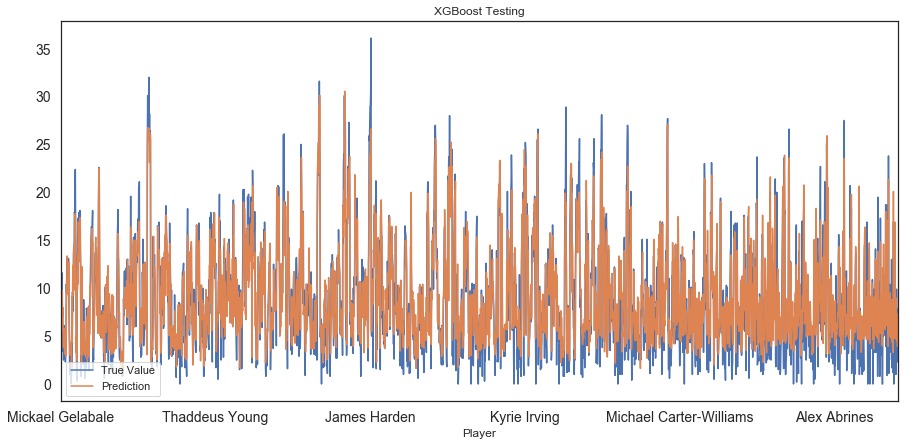

adj test r^2 = 0.6881722507555552
test mse = 10.694735367009166


In [44]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## Neural Network

In [45]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [47]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=21, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
out = model.fit(train_x.values, train_y.PTS2.values, validation_data=[test_x.values, test_y['PTS2'].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])

Instructions for updating:
Use tf.cast instead.


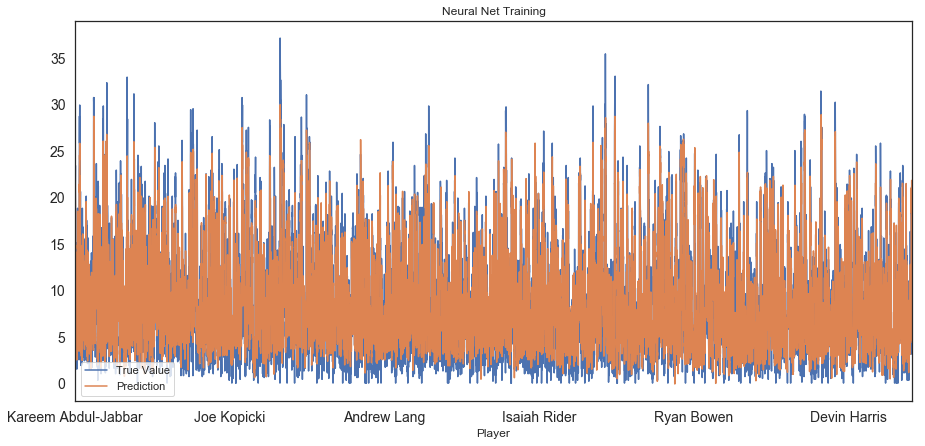

adj train r^2 = 0.7969823659870922
train mse = 7.940129276823225


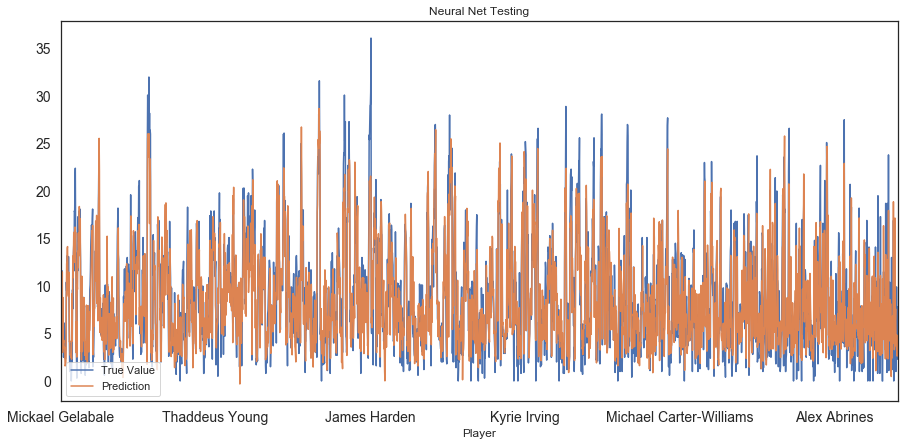

adj test r^2 = 0.6613276128693388
test mse = 11.61542410914935


In [48]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'Neural Net Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Neural Net Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## LSTM

In [49]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [51]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(1, train_x.values.shape[1]), recurrent_activation='tanh'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.PTS2.values.ravel(), validation_data=[X_tst_t, test_y['PTS2'].values.ravel()], epochs=50, verbose=1, shuffle=False, callbacks=[early_stop])

Train on 10827 samples, validate on 2707 samples
Epoch 1/50
10827/10827 [==============================] - 4s 408us/step - loss: 0.3165 - val_loss: 0.2643
Epoch 2/50
10827/10827 [==============================] - 3s 238us/step - loss: 0.2499 - val_loss: 0.2580
Epoch 3/50
10827/10827 [==============================] - 3s 235us/step - loss: 0.2418 - val_loss: 0.2565
Epoch 4/50
10827/10827 [==============================] - 3s 235us/step - loss: 0.2378 - val_loss: 0.2553
Epoch 5/50
10827/10827 [==============================] - 3s 235us/step - loss: 0.2351 - val_loss: 0.2544
Epoch 6/50
10827/10827 [==============================] - 3s 238us/step - loss: 0.2331 - val_loss: 0.2538
Epoch 7/50
10827/10827 [==============================] - 3s 258us/step - loss: 0.2313 - val_loss: 0.2534
Epoch 8/50
10827/10827 [==============================] - 3s 236us/step - loss: 0.2299 - val_loss: 0.2532
Epoch 9/50
10827/10827 [==============================] - 3s 235us/step - loss: 0.2285 - val_loss: 0.25

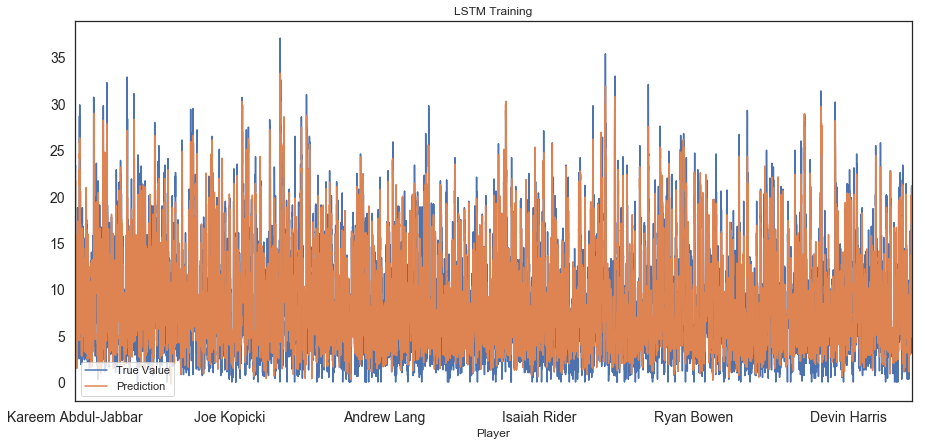

adj train r^2 = 0.807570439424623
train mse = 7.526024008109729


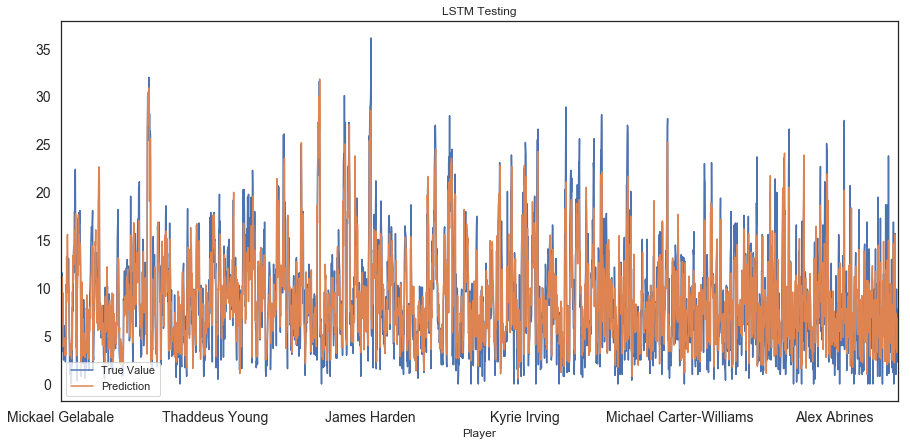

adj test r^2 = 0.6647928067459057
test mse = 11.496578587559119


In [53]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## TPOT

In [59]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(max_time_mins=1, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.PTS2.values.ravel())



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.6000000000000001, tol=0.001)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=1, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=100,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

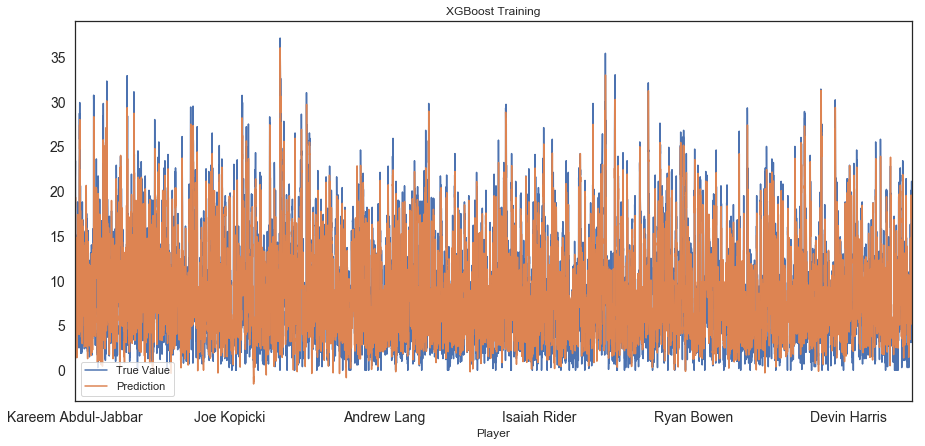

adj train r^2 = 0.7607561786071072
train mse = 9.356955024015285


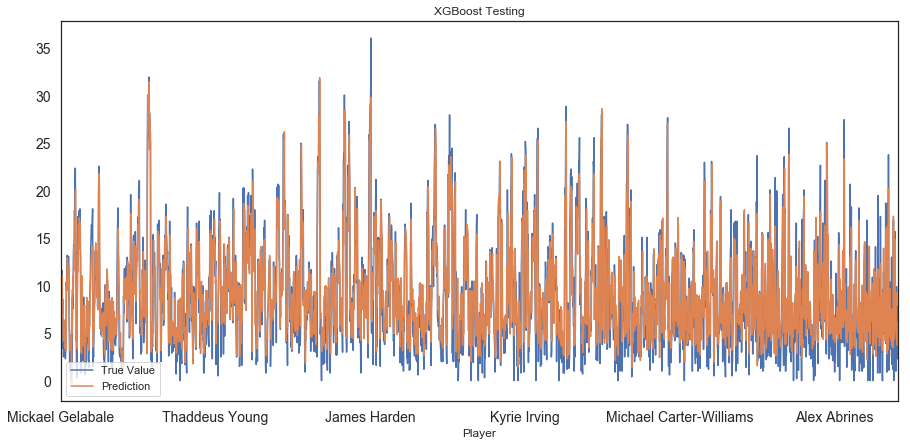

adj test r^2 = 0.7143239172719219
test mse = 9.797813417386369


In [56]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## Predictions

In [57]:
train=df3
test=df4
trains = np.split(train, [21], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [21], axis=1)
test_x=tests[0]
test_y=tests[1]

In [58]:
test_y.head()

,PTS2,TRB2,AST2,STL2,BLK2
Player,,,,,
Alex Abrines,-1.388711,-1.393176,-1.023976,-1.403664,-0.823836
Quincy Acy,-1.388711,-1.393176,-1.023976,-1.403664,-0.823836
Jaylen Adams,-1.388711,-1.393176,-1.023976,-1.403664,-0.823836
Steven Adams,-1.388711,-1.393176,-1.023976,-1.403664,-0.823836
Bam Adebayo,-1.388711,-1.393176,-1.023976,-1.403664,-0.823836


In [60]:
from sklearn.feature_selection import RFE
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    train_x3 = train_x
    test_x3 = test_x
    K.clear_session()
    model = TPOTRegressor(max_time_mins=1, verbosity=1, config_dict='TPOT light').fit(train_x3.values, train_y[col].values.ravel())
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3.values))


1.0781643 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.35000000000000003, tol=0.1)

1.0578057666666667 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.9, tol=0.001)

1.023598 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.7000000000000001, tol=0.01)

1.0465608333333334 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: RidgeCV(input_matrix)

1.0540407833333334 minutes have elapsed. TPOT wi

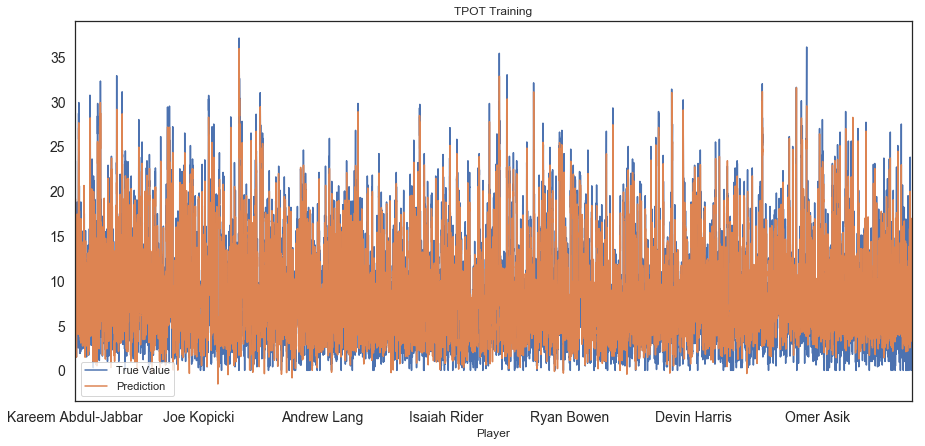

adj train r^2 = 0.7524607195509851
train mse = 9.448080539014928


In [61]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))

In [64]:
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

,PTS2,TRB2,AST2,STL2,BLK2,Value
Player,,,,,,
James Harden,34.274812,6.748725,7.521128,1.938732,0.721153,61.634628
Giannis Antetokounmpo,28.135309,12.501211,6.083101,1.419628,1.554751,61.184549
Anthony Davis,26.162739,12.166517,4.270431,1.540499,2.230124,58.480074
Joel Embiid,27.773005,13.265932,3.914677,0.927350,1.842627,57.874070
Russell Westbrook,22.324527,9.942358,9.700678,1.844289,0.577705,56.072357
LeBron James,25.089095,7.936414,7.624243,1.331779,0.658339,52.019509
Karl-Anthony Towns,23.773495,11.788571,3.463441,1.004464,1.544284,50.761185
Nikola Jokic,20.717764,10.367289,6.981658,1.467150,0.780170,50.372958
Paul George,26.469922,7.836526,4.423662,1.930224,0.481719,49.745076


In [67]:
dftail = pd.read_csv('NBAFuturesTest1.csv')
dftail = dftail[['Player','PTS','TRB','AST','STL','BLK']]
dftail['Value'] = 1*dftail['PTS'] + 1.2*dftail['TRB'] + 1.5*dftail['AST'] + 3*dftail['STL'] + 3*dftail['BLK']
dftail = dftail.set_index('Player')
dftail.sort_values('Value', ascending=False).head(10)

,PTS,TRB,AST,STL,BLK,Value
Player,,,,,,
James Harden,36.1,6.6,7.5,2.0,0.7,63.37
Giannis Antetokounmpo,27.7,12.5,5.9,1.3,1.5,59.95
Russell Westbrook,22.9,11.1,10.7,1.9,0.5,59.47
Anthony Davis,25.9,12.0,3.9,1.6,2.4,58.15
Joel Embiid,27.5,13.6,3.7,0.7,1.9,57.17
LeBron James,27.4,8.5,8.3,1.3,0.6,55.75
Karl-Anthony Towns,24.4,12.4,3.4,0.9,1.6,51.88
Paul George,28.0,8.2,4.1,2.2,0.4,51.79
Nikola Jokic,20.1,10.8,7.3,1.4,0.7,50.31


In [68]:
test_y2['Improved'] = test_y2['Value'] - dftail['Value']
test_y2.sort_values('Improved', ascending=False).head(10)

,PTS2,TRB2,AST2,STL2,BLK2,Value,Improved
Player,,,,,,,
Dzanan Musa,4.942549,1.744291,0.873398,0.392561,0.145028,9.958562,6.238562
Jarred Vanderbilt,4.429445,2.442972,0.919064,0.533584,0.241867,11.065963,6.185963
Isaac Bonga,4.004825,2.242295,1.299130,0.546556,0.314404,11.227155,6.157155
Trevon Duval,4.252611,1.591084,1.224762,0.248907,0.164991,9.240750,6.130750
Ike Anigbogu,2.962239,2.133288,0.822745,0.234072,0.400953,8.661375,6.111375
Kostas Antetokounmpo,3.894311,1.737325,0.848551,0.933450,0.163708,10.543401,5.943401
Kobi Simmons,2.514605,1.189632,0.549062,0.200940,0.137493,5.781058,5.781058
Anfernee Simons,6.158072,1.850441,1.216194,0.331032,0.152906,11.654709,5.664709
Drew Eubanks,4.391454,2.536787,0.858489,0.297963,0.318217,10.571871,5.621871
